<a href="https://colab.research.google.com/github/edufheinsen/numpy_tutorial/blob/main/PDS_Numpy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDS NumPy Workshop

## Structure

1 - NumPy
* Motivation for using NumPy instead of standard Python lists
* NumPy basics - what are ndarrays/numpy arrays, creating arrays with lists (of dimensions 1, 2, and 3), ndim, shape, size, dtype, np.zeros, np.ones, arange, linspace
* Indexing and slicing with multidimensional arrays, reshaping and reshaping with -1 as argument
* Stacking (vstack, hstack)
* Math operations with numpy - adding/subtracting with same size, adding/subtracting/multiplying array by constant with broadcasting, elementwise product, matrix product, aggregate functions like sum(), min(), max()
* Linear algebra with np.linalg, solving systems of linear equations, finding eigenvalues of matrix, inverse, matrix power

2 - PCA with MNIST
* explain MNIST dataset and goal - classifying digits based on their grayscale pixel values
* explain PCA - dimensionality reduction to get the directions where the image varies most
* now actual PCA/code
* a - Preprocess data to convert to mean 0 and stdev 0
* b - Compute covariances and eigenvalue/eigenvectors, choose top k eigenvectors to capture variance
* c - Project training images onto reduced dimensionality eigenbasis and reproject to standard basis
* d - Project test images onto eigenbasis and back
* e - Test the transformed test images vs the transformed training images with labels using k nearest neighbors

## Numpy Basics

### ndarrays

In [ ]:
# Generally use Python lists to process "arrays of numbers in Python"
ls = [1,2,3,4]

In [ ]:
ls

In [ ]:
# Even though the elements in a given list can be of different types, can get slow when dealing with large amounts 
# of data and it's not easy to do complex math/linear algebra with them

In [ ]:
# That's why we use NumPy instead - Python library for scientific computing and linear algebra that is based on 
# its "ndarray" data structure.

In [ ]:
import numpy as np # this is the standard way to import it

In [ ]:
# One dimensional array (vector)
vec = np.array([1,2,3,4])

In [ ]:
vec

In [ ]:
# Two dimensional array (matrix)
mat = np.array([[1,2,3],[4,5,6]])

In [ ]:
mat

In [ ]:
# Three dimensional array (3-d tensor)
tensor = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10, 11, 12]]])

In [ ]:
tensor

In [ ]:
# In general, can manipulate arrays with an arbitrary number of dimensions

In [ ]:
# To get the number of dimensions of an array, use ndim.
print(vec.ndim) # 1
print(mat.ndim) # 2
print(tensor.ndim) # 3

In [ ]:
# To get the shape of an array, use shape
print(vec.shape) 
print(mat.shape)
print(tensor.shape)

In [ ]:
# To get the number of elements in an array, use size
print(vec.size) 
print(mat.size)
print(tensor.size)

In [ ]:
# NumPy has convenient ways to quickly construct arrays without manually creating a list first.
zeros = np.zeros((3, 4)) # creates 3 x 4 matrix filled with zeros

In [ ]:
zeros

In [ ]:
ones = np.ones((3, 4)) # creates 3 x 4 matrix filled with ones

In [ ]:
ones

In [ ]:
nums = np.arange(10) # creates vector filled with numbers from 0 to 9, inclusive

In [ ]:
nums

In [ ]:
linear = np.linspace(0, 10, 50) # creates vector filled with 50 equally spaced numbers from 0 to 10, inclusive

In [ ]:
linear

In [ ]:
np.sin(linear)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(np.sin(linear))

### Indexing

In [ ]:
# Indexing into 1-D NumPy arrays is very similar to indexing into Python lists

In [ ]:
arr = np.arange(9)**2

In [ ]:
arr

In [ ]:
arr[0] # NumPy arrays are 0-indexed, like lists in Python and arrays in Java/C

In [ ]:
arr[0:2] # element at index 0 is included, element at index 2 is not, just like in Python

In [ ]:
# can also iterate through 1-D ndarrays like you would through lists
for elem in arr:
    print(elem)

In [ ]:
# Multidimensional arrays need an index for each of their axes/dimensions

In [ ]:
multi = np.array([[1,2,3,4,5],[6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])

In [ ]:
multi

In [ ]:
multi[0, 2] # element in row 0, column 2

In [ ]:
multi[0:2, 1:5] # array with elements in rows 0-1 (row 2 not included) and columns 1-4

In [ ]:
multi[:, 2:4] # array with elements in all rows and columns 2-3 of the original

In [ ]:
multi[-1, :] # array with the last row of the original

### Reshaping and stacking

In [ ]:
# Can change the shape of an array - useful when we need data to be in a specific form for a computation

In [ ]:
orig = np.arange(9)
arr = orig.reshape(3, 3) # reshape returns a new array with the same values as the original in the specified shape

In [ ]:
orig

In [ ]:
arr

In [ ]:
orig.resize(3, 3) # resize changes the shape of the array in place

In [ ]:
orig

In [ ]:
orig.resize(9)

In [ ]:
new_arr = orig.reshape(3, -1) # when -1 is an argument to reshape, NumPy figures out what the missing dimensions 
                              # must be on its own

In [ ]:
new_arr # in this case, since the original array has 9 elements, if its reshaped version has 3 rows it must have 3 
        # columns

In [ ]:
a = np.arange(6).reshape(2, 3)
b = np.arange(8).reshape(2, 4)
c = np.arange(9).reshape(3, 3)

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
np.hstack((a, b)) # if two arrays have the same number of rows, can stack them horizontally with hstack

In [ ]:
np.vstack((a, c)) # if two arrays have the same number of columns, can stack them vertically with vstack

In [ ]:
mat = np.arange(9).reshape(3, 3)

In [ ]:
mat

In [ ]:
mat.T # transposes an array

### Useful functions on arrays

In [ ]:
a = np.arange(1, 9)

In [ ]:
a

In [ ]:
a.sort()

In [ ]:
a

In [ ]:
a.max() # max element

In [ ]:
a.min() # min element

In [ ]:
a.sum() # sum of all elements

In [ ]:
a.prod() # product of all alements

In [ ]:
a.mean() # average of elements

In [ ]:
a.std() # standard deviation of elements

In [ ]:
# Let's do a speed test - sum all numbers from 0 to 10^8-1

In [ ]:
l = [i for i in range(10**8)] # using Python lists

In [ ]:
%%time
sum(l)

In [ ]:
np_list = np.arange(10**8) # using NumPy

In [ ]:
%%time
np_list.sum() # should be about 20x as fast

### Basic math

In [ ]:
a = np.arange(9).reshape(3, 3)
b = (np.arange(9)**2).reshape(3, 3)

In [ ]:
a

In [ ]:
b

In [ ]:
a + b # can add arrays with the same shape elementwise

In [ ]:
a + 3 # can add a constant to all elements in an array

In [ ]:
a * b # can multiply arrays with the same shape elementwise

In [ ]:
a * 3 # can multiply a constant by all elements in an array

### Linear algebra

In [ ]:
# NumPy almost certainly has all the built-in functions you'll need for linear algebra

In [ ]:
vec1 = np.arange(9)
vec2 = np.arange(9)**2

In [ ]:
vec1

In [ ]:
vec2

In [ ]:
vec1.dot(vec2) # dot product of two vectors (1-D arrays)

In [ ]:
mat1 = np.arange(9).reshape(3, 3)
mat2 = (np.arange(9)**2).reshape(3, 3)

In [ ]:
mat1

In [ ]:
mat2

In [ ]:
mat1 @ mat2 # matrix product of two matrices (2-D arrays)

In [ ]:
mat1 @ mat1 @ mat1 # can be awkward to write, so ...

In [ ]:
np.linalg.matrix_power(mat1, 3) # raise matrix to a power

In [ ]:
eig_vals, eig_vectors = np.linalg.eig(mat1)

In [ ]:
eig_vals # eigenvalues

In [ ]:
eig_vectors # columns in this matrix are the corresponding (normalized) eigenvectors

In [ ]:
np.linalg.det(mat2) # matrix determinant

In [ ]:
np.trace(mat1) # trace of a matrix

In [ ]:
np.linalg.inv(mat2) # matrix inverse

## Handwritten Digit Recognition with the MNIST Dataset

In [ ]:
def display_mnist_image(image: np.ndarray):
    """
    Displays image of digit in the MNIST dataset

    Args:
        image: (784, ) array containing MNIST image
    """
    plt.imshow(image.reshape(28, 28))
    plt.show()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

In [ ]:
for i in range(10):
    display_mnist_image(X_train[i])

In [ ]:
#60000 training samples, 28x28 pixel images
X_train.shape

In [ ]:
# Reduce number of training samples
num_train_samples = 5000
X_train = X_train[:num_train_samples, :]

In [ ]:
X_train.shape

In [ ]:
y_train = y_train[:num_train_samples]

In [ ]:
X_train = X_train.reshape(num_train_samples, 784)
X_test = X_test.reshape(-1, 784)

Lets first try visualizing our X_train variable. There are 5000 images of handwritten digits and each digit can be represented by a vector of 784 elements, where each element is a pixel in a 28x28 image. So if we consider each vector as a point in high dimensional space, we have a set of 5000 points in this high dimensional space. In other words, X_train basically holds a point cloud. Here is an example of a point cloud in 3 dimensions. 

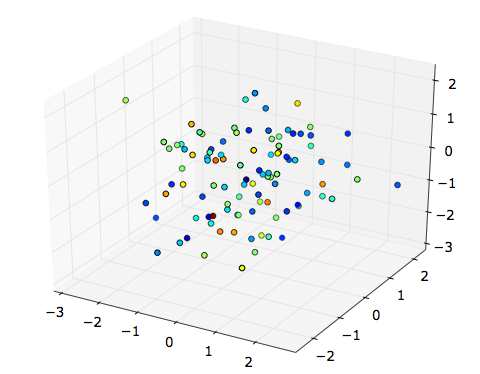

In [ ]:
#shift the data so that the mean of the vectors is 0, normalization is a common step in most machine learning algorithms as it simplifies the later steps
train_mean = X_train.mean(axis=0)
X_train_zero_centered = X_train - train_mean

The point cloud is only a sample of the much larger distribution of all possible 28x28 pixel images of handwritten digits. Let's assume that this distribution is approximately multivariate gaussian distribution. Recall that the 1d gaussian distribution is described by the mean and standard deviation. The multivariate gaussian is described by a mean vector and a covariance matrix. In our case the mean vector is 0 since I normalized the vectors. However we do care about the covariance matrix which describes the shape of the point cloud. As a visualization, here is a 2d point cloud fit to a gaussian. 

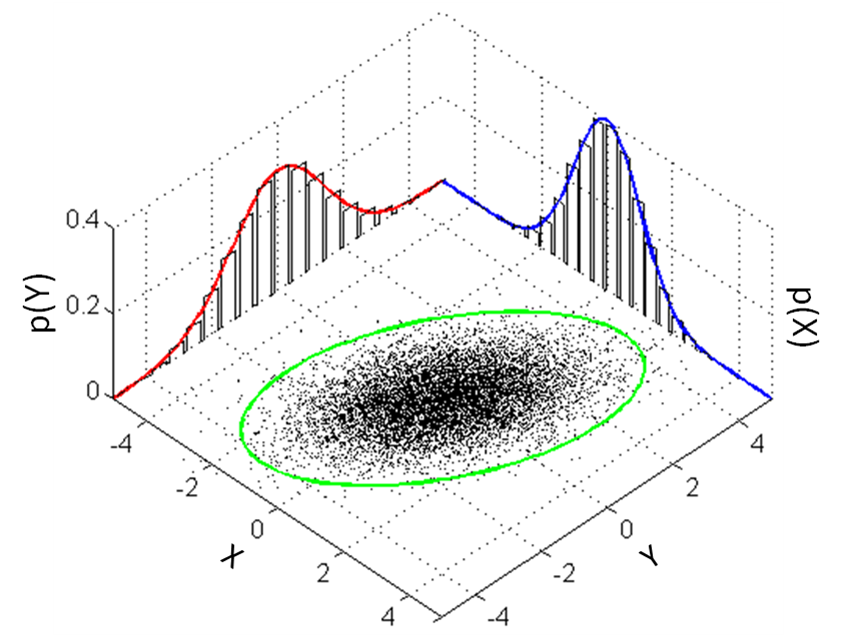

Just like you can compute the mean or standard deviation of a set of points with a simple formula, you can also figure out the covariance matrix of a set of multivariate points in closed form. Here is the formula: 

In [ ]:
# Get covariance matrix (784x784 matrix)
cov = X_train_zero_centered.T @ X_train_zero_centered/(num_train_samples - 1)

The next step rests on an observation of the data set. Imagine all the possible 28x28 gray scale images. This set is enormous, most of the images in this set won't look like anything (just noise), a few will have some organization and structure, and very small set will look like handwritten digits. In other words, the set of all handwritten digits occupies a very small subspace in the 784 dimensional vector space. (Imagine points lying in a line in 3d space). Here is a lower dimensional visualization of what is going on:

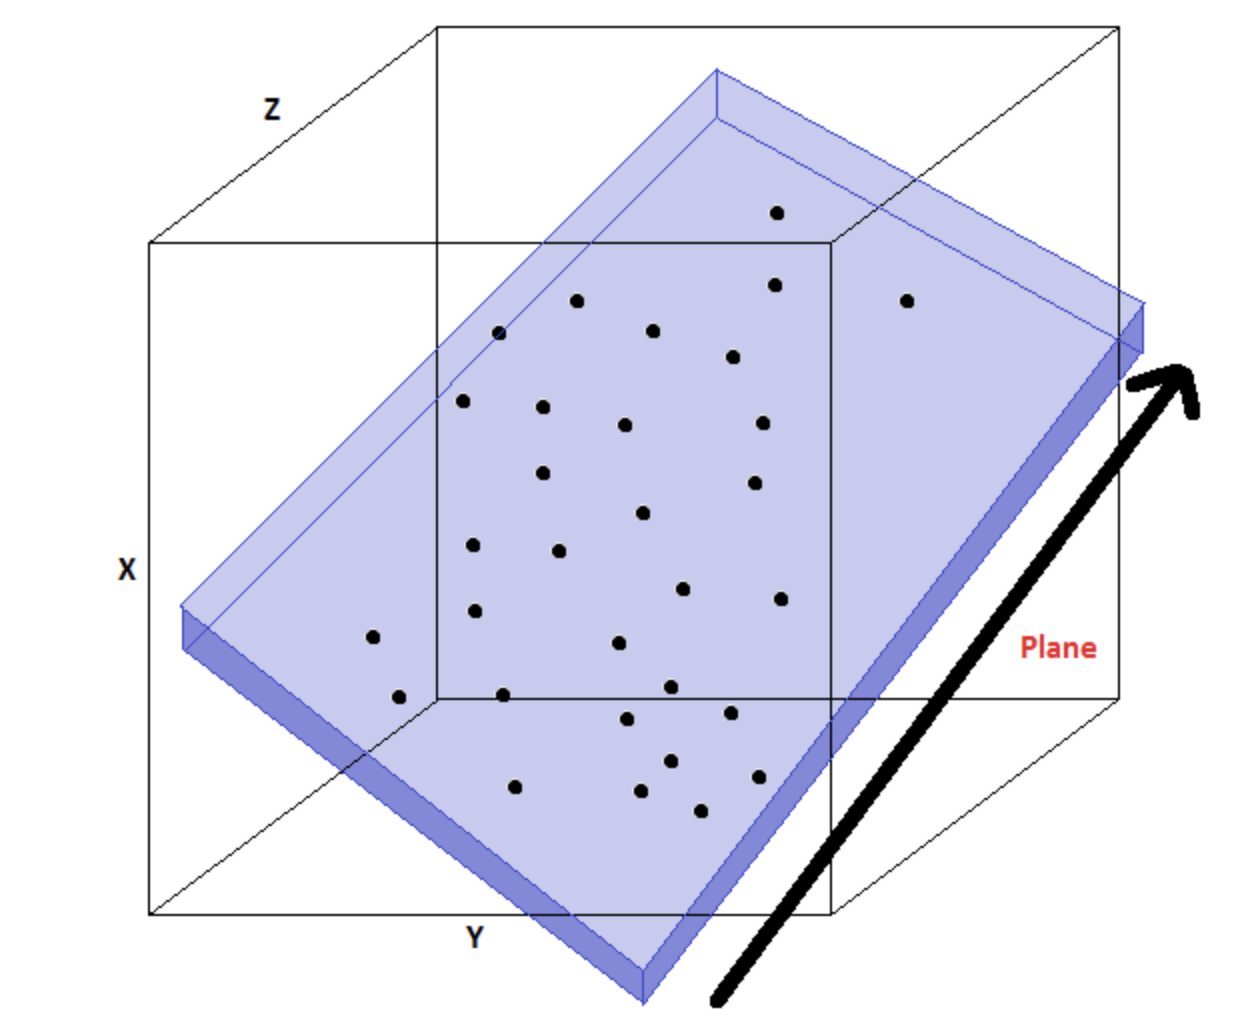

The analogy here is that all handwritten digits lie approximately in the plane, and the 3d cube is the space of all possible 28x28 images. So instead of representing each point with 3 numbers (x,y,z) we can project the points onto the plane and create a new coordinate system on the plane and use two numbers (v,w) to describe the approximate position of the point on the plane. Because the points lie approximately in the plane, we loose very little information when projecting them onto the plane.

In the above low-dimensional example we could visually see the subspace our points were in and we could determine the dimension of the subspace visually. 

How do we do that in higher dimensional spaces?

**It turns out that the eigenvalues of the covariance matrix give the variance along perpendicular directions specified by the eigenvectors** (in linear algebra terms, the covariance matrix is symmetric so it is diagonalizable, which means there exist 'principle' directions). Visually it looks like this:

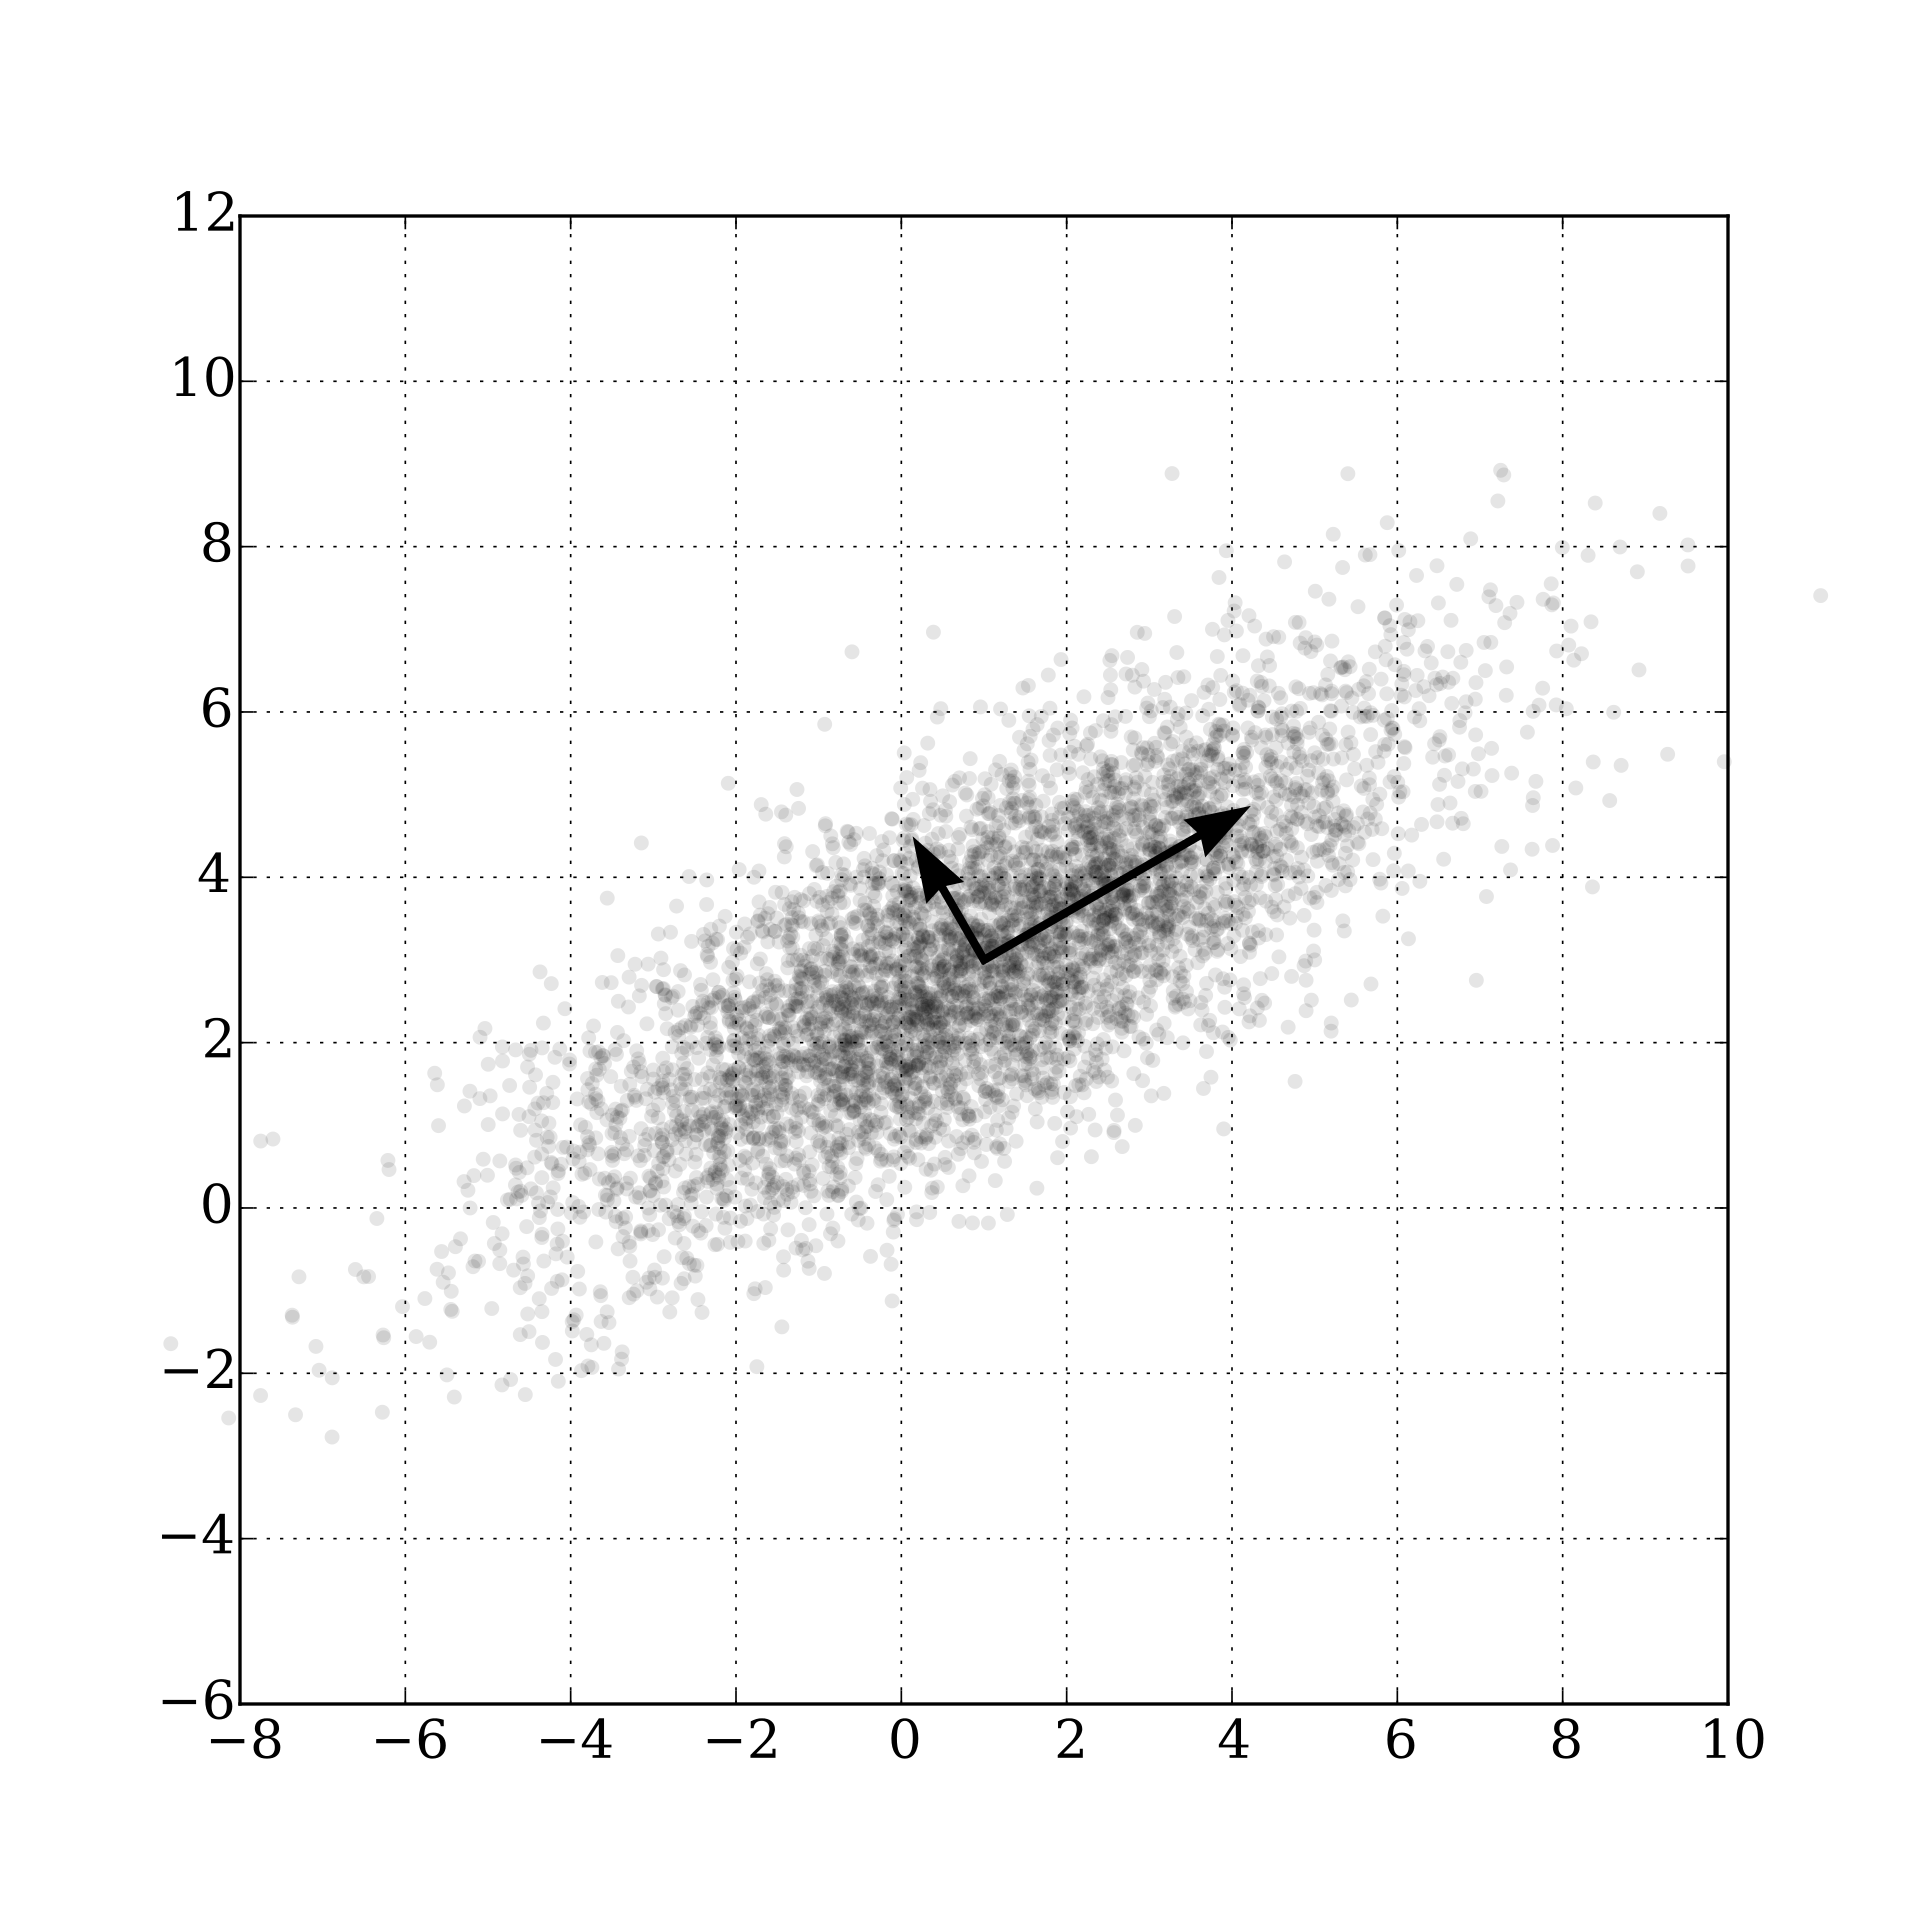



*If you had to describe the points with only one coordinate, which coordinate of the two shown would you use?*

In [ ]:
## Get eigenvectors and eigenvalues of the covariance matrix

e_vals, e_vecs = np.linalg.eig(cov)

e_vals = e_vals.astype(np.float)
e_vecs = e_vecs.astype(np.float)
total_variance = e_vals.sum()

explained_variance = 0.75
num_vecs = 0
for i in range(e_vals.shape[0]):
    curr_explained_var = e_vals[:i].sum()/total_variance
    if curr_explained_var >= explained_variance:
        num_vecs = i + 1
        break
Vk = e_vecs[:, :num_vecs]
print(Vk.shape)

In [ ]:
# Project training images onto reduced dimensionality eigenbasis and reproject to standard basis

#essentially we are representing the length 784 image vector as a linear combination of the k eigenvectors selected previously
#thus instead of having a length 784 vector that represented the image, we know have a length k list of coefficients of the linear combination that approximate the original image



F = X_train_zero_centered @ Vk

#We can go back to the 784 pixel representation by evaluating the linear combination. Of course we lost some information going to the k dimensional subspace, but as you can see the 
#reconstructed images actually resemble the same digit

X_train_zero_centered_k = F @ Vk.T


In [ ]:
# Display reconstructed image using num_vecs (in this case, 34) eigenvectors
for i in range(10):
    display_mnist_image(X_train_zero_centered_k[i])

In [ ]:
# Project test images onto eigenbasis and reproject back (this is the same thing we did with the training images, we expect slightly worse results here however)

In [ ]:
num_test_samples = 500

X_test = X_test[:num_test_samples, :]

y_test = y_test[:num_test_samples]

X_test_std = X_test - train_mean

F_test = X_test_std @ Vk

X_test_std_k = F_test @ Vk.T

In [ ]:
# Display reconstructed test images
for i in range(10):
    display_mnist_image(X_test_std_k[i])

Now we actually try to classify the images in the test set. To do this, we will use the median_nearest_neighbor() function:

- y_train is a 5000-dimensional vector with the labels for the training images

- F_train is a [5000, 34] matrix - each row of this matrix corresponds to the projection of a training image onto the subspace spanned by the 34 eigenvectors of the covariance matrix with the largest eigenvalues

- F_test_row is the projection of a single test image onto the subspace spanned by the 34 eigenvectors of the covariance matrix with the largest eigenvalues

- K is the number of "neighbors" we will consider (explained below)

The idea is to 
* iterate through all the rows of F_train (i.e. through all the projected training images)
* calculate the Euclidean distance between F_test_row (the projected *test* image that we're trying to classify) and each of the projected training images
* select the K projected training images with the smallest distance to the projected test image. 

These are the K "nearest neighbors" of the projected test image in the subspace spanned by the eigenvectors, so we predict that the label corresponding to F_test is the same as the label corresponding to the median of this set of nearest neighbors (when they're sorted by distance to the projected test image).

In [ ]:
# Classify the projected test set image by finding the nearest projected training set image
def median_nearest_neighbor(y_train, F_train, F_test_image, K):
    # distance[i] is the distance of the projected training image in row i of F_train to the
    # projected test image in F_test_image
    n = F_train.shape
    distance = np.zeros(n[0])
    for i in range(n[0]):
        distance[i] = np.sqrt(((F_train[i,:]-F_test_image)**2).sum())
    
    # sort_indices is a vector containing the indices that would sort the distance
    # vector in ascending order. 
    # For example, if distance was the vector [5, 1, 4, 2, 3],
    # then sort_indices would be [1, 3, 4, 2, 0]
    # Therefore, sort_indices[0] is the row (in the original training data)
    # corresponding to the training image that is closest to the test image
    # when projected onto the subspace spanned by the eigenvectors.
    sort_indices = np.argsort(distance)

    # temp is a vector containing the labels corresponding to the training images
    # that are closest to the test image when projected onto the subspace spanned by the eigenvectors
    temp = np.zeros(K)
    for i in range(K):
        temp[i] = y_train[sort_indices[i]]

    # the median of these labels (when they are sorted by distance) is our prediction
    # for the label of the test image
    prediction = np.median(temp)
    return prediction

In [ ]:
correct = 0
K = 5
for i in range(num_test_samples):
    prediction = median_nearest_neighbor(y_train,F,F_test[i,:],K)
    if prediction == y_test[i]:
        correct = correct + 1

accuracy = correct/num_test_samples

In [ ]:
accuracy